# Imports

In [233]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot
from datetime import datetime
import requests
import pytz
import os 
import glob 
import math
import time

# Timestamp to Date

In [234]:
ntp_epoch = datetime(1900, 1, 1)
unix_epoch = datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()



# Combining the CSV files in Shelf Surface 

In [21]:
#Only do once to merge CSV files or will keep readding CSV files to the same one*******
#os.chdir(r"C:\Users\Ramiro\Desktop\Shelf Surface")
#all_filenames = [i for i in glob.glob ('*{}'.format('csv'))]
#combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
#combined_csv.to_csv("Shelf Surface Year.csv", index= False, encoding = 'utf-8-sig')

# Combining the CSV files in the Offshore Surface 

In [22]:
#Only do once to merge CSV files
#os.chdir(r"C:\Users\Ramiro\Desktop\Offshore Surface")
#all_filenames = [i for i in glob.glob ('*{}'.format('csv'))]
#combined_csv2=pd.concat([pd.read_csv(f) for f in all_filenames])
#combined_csv2.to_csv("Offshore Surface Year.csv", index= False, encoding = 'utf-8-sig')

# Reading in new CSV Files Combined

In [71]:
df = pd.read_csv(r"C:\Users\Ramiro\Desktop\Shelf Surface\Shelf Surface Year.csv")
df1 = pd.read_csv(r"C:\Users\Ramiro\Desktop\Offshore Surface\Offshore surface year.csv")

# Grabbing Variables from CSV / Calculations 

In [99]:
TimeShelf=df.time
TimeOffShore=df1.time

precipitationshelf=df.precipitation/60
precipitationoffshore=df1.precipitation/60

#Shelf Surface Wind
nwindshelf=df.northward_wind_velocity**2 #Squaring wind velocities 
ewindshelf=df.eastward_wind_velocity**2
Wind_Vel_Shelf=(nwindshelf+ewindshelf)**(1/2) #Calculating Velocity of Wind

#OffShore Surface Wind
nwindoff=df1.northward_wind_velocity**2 #Squaring wind velocities 
ewindoff=df1.eastward_wind_velocity**2
Wind_Vel_Off=(nwindoff+ewindoff)**(1/2) #Calculating Velocity of Wind


Text(0, 0.5, 'Rain Rate (mm/H)')

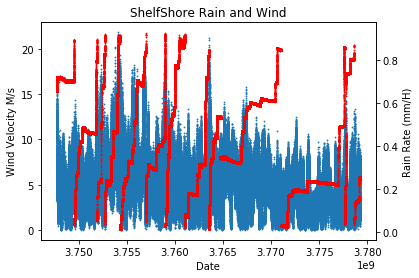

In [128]:
fig, ax = plt.subplots()
plt.title('ShelfShore Rain and Wind')
ax.scatter(TimeShelf,Wind_Vel_Shelf,s=0.6)

ax2=ax.twinx()
ax2.scatter(TimeShelf,precipitationshelf,c='r', s=0.6)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Velocity M/s')

ax2.set_ylabel('Rain Rate (mm/H)')


Text(0, 0.5, 'Rain Rate (mm/H)')

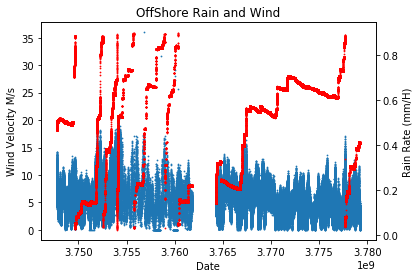

In [129]:
fig, ax = plt.subplots()
plt.title('OffShore Rain and Wind')
ax.scatter(TimeOffShore,Wind_Vel_Off,s=0.6)

ax2=ax.twinx()
ax2.scatter(TimeOffShore,precipitationoffshore,c='r',s=0.6)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Velocity M/s')

ax2.set_ylabel('Rain Rate (mm/H)')

max correlation is at lag -1


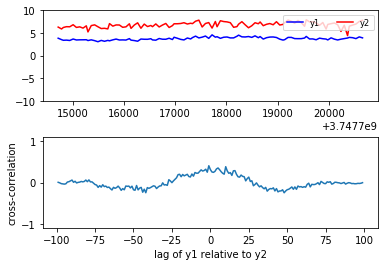

In [222]:
npts=100
x = np.asarray(TimeShelf[0:npts])

y1 = np.asarray(Wind_Vel_Shelf[0:npts])
y2 = np.asarray(Wind_Vel_Off[0:npts])


lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)

max correlation is at lag -12


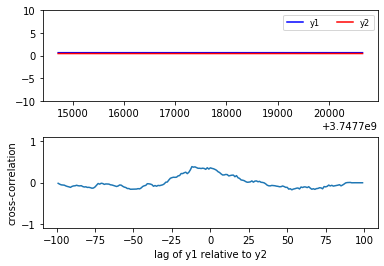

In [231]:
npts=100
x = np.asarray(TimeShelf[0:npts])

y1 = np.asarray(precipitationshelf[0:npts])
y2 = np.asarray(precipitationoffshore[0:npts])



lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, y1, 'b', label='y1')
ax.plot(x, y2, 'r', label='y2')
ax.set_ylim(-10, 10)
ax.legend(loc='upper right', fontsize='small', ncol=2)

ax = axs[1]
ax.plot(lags, ccor)
ax.set_ylim(-1.1, 1.1)
ax.set_ylabel('cross-correlation')
ax.set_xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)


[0, 30000]
